In [1]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
data = pd.read_csv("data\heating_data.csv")
del data['Unnamed: 0']

pd.options.display.float_format = '{:,.2f}'.format

In [3]:
# Example of observations 
display(data.head(5))
print("\n{} Rows and {} columns.".format(data.shape[0],data.shape[1]))

,idcase,depvar,ic.gc,ic.gr,ic.ec,ic.er,ic.hp,oc.gc,oc.gr,oc.ec,oc.er,oc.hp,income,agehed,rooms,region
0,1,gc,866.00,962.64,859.90,995.76,"1,135.50",199.69,151.72,553.34,505.60,237.88,7,25,6,ncostl
1,2,gc,727.93,758.89,796.82,894.69,968.90,168.66,168.66,520.24,486.49,199.19,5,60,5,scostl
2,3,gc,599.48,783.05,719.86,900.11,"1,048.30",165.58,137.80,439.06,404.74,171.47,4,65,2,ncostl
3,4,er,835.17,793.06,761.25,831.04,"1,048.70",180.88,147.14,483.00,425.22,222.95,2,50,4,scostl
4,5,er,755.59,846.29,858.86,985.64,883.05,174.91,138.90,404.41,389.52,178.49,2,25,6,valley



900 Rows and 16 columns.


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 16 columns):
idcase    900 non-null int64
depvar    900 non-null object
ic.gc     900 non-null float64
ic.gr     900 non-null float64
ic.ec     900 non-null float64
ic.er     900 non-null float64
ic.hp     900 non-null float64
oc.gc     900 non-null float64
oc.gr     900 non-null float64
oc.ec     900 non-null float64
oc.er     900 non-null float64
oc.hp     900 non-null float64
income    900 non-null int64
agehed    900 non-null int64
rooms     900 non-null int64
region    900 non-null object
dtypes: float64(10), int64(4), object(2)
memory usage: 105.5+ KB


In [5]:
# levels counts of heating systems
pd.DataFrame(data['depvar'].value_counts()).transpose()

,gc,gr,er,ec,hp
depvar,573,129,84,64,50


In [6]:
# Summary of the installation cost for the 5 alternatives (ic columns)
data_ic = data[['ic.gc','ic.gr','ic.ec','ic.er','ic.hp']]
data_ic.describe().loc[['mean','std','min','50%','max']].style.highlight_min(axis=1).highlight_max(axis=1,color = 'green')

,ic.gc,ic.gr,ic.ec,ic.er,ic.hp
mean,776.827,921.77,824.543,983.928,1046.48
std,115.563,138.087,125.274,147.155,156.703
min,431.83,574.94,469.61,546.82,532.32
50%,778.505,924.305,824.84,989.7,1046.55
max,1158.9,1344,1230.5,1496.3,1679.8


In [7]:
# Summary of annual operating cost for heating systems (oc columns)
data_oc = data[['oc.gc','oc.gr','oc.ec','oc.er','oc.hp']]
data_oc.describe().loc[['mean','std','min','50%','max']].style.highlight_min(axis=1).highlight_max(axis=1,color = 'green')

,oc.gc,oc.gr,oc.ec,oc.er,oc.hp
mean,172.116,154.471,476.803,429.73,219.299
std,25.9398,22.8857,73.1533,65.7926,32.9696
min,84.016,77.863,237.44,179.95,120.97
50%,172.105,154.11,480.055,430.665,220.845
max,248.43,227.92,705.36,664.43,318.58


In [8]:
# Summary of income
pd.DataFrame(data['income'].describe()).transpose()

,count,mean,std,min,25%,50%,75%,max
income,900.00,4.64,1.68,2.00,3.00,5.00,6.00,7.00


In [9]:
# Summary of age
pd.DataFrame(data['agehed'].describe()).transpose()

,count,mean,std,min,25%,50%,75%,max
agehed,900.00,42.94,14.09,20.00,30.00,45.00,55.00,65.00


In [10]:
# Summary of rooms
pd.DataFrame(data['rooms'].describe()).transpose()

,count,mean,std,min,25%,50%,75%,max
rooms,900.00,4.42,1.74,2.00,3.00,4.00,6.00,7.00


In [11]:
#  levels counts of region
pd.DataFrame(data['region'].value_counts()).transpose()

,scostl,ncostl,valley,mountn
region,361,260,177,102


In [12]:
display(data['depvar'].value_counts())
data.describe()
#data[['ic.gc','ic.gr','ic.ec','ic.er','ic.hp']].describe()
data_heat = data[['ic.gc','ic.gr','rooms']]
data_heat.groupby(['rooms']).mean()

gc    573
gr    129
er     84
ec     64
hp     50
Name: depvar, dtype: int64

,ic.gc,ic.gr
rooms,,
2,769.46,922.00
3,778.96,905.99
4,761.96,929.38
5,786.09,932.55
6,786.58,925.85
7,779.37,917.31


In [13]:
data.groupby(['rooms']).mean()

,idcase,ic.gc,ic.gr,ic.ec,ic.er,ic.hp,oc.gc,oc.gr,oc.ec,oc.er,oc.hp,income,agehed
rooms,,,,,,,,,,,,,
2,449.81,769.46,922.00,820.51,985.19,"1,049.88",171.49,154.04,476.85,431.58,218.97,4.66,42.93
3,469.25,778.96,905.99,818.49,980.15,"1,041.33",168.45,153.60,477.08,427.35,218.30,4.52,43.30
4,437.33,761.96,929.38,816.67,983.54,"1,036.10",171.35,155.41,478.58,427.04,216.07,4.78,44.06
5,454.98,786.09,932.55,836.75,986.04,"1,059.89",174.62,155.84,481.01,436.24,220.13,4.38,41.72
6,429.81,786.58,925.85,844.82,984.55,"1,061.22",174.97,154.39,474.98,429.14,224.27,4.72,43.69
7,459.28,779.37,917.31,812.95,984.38,"1,032.21",172.46,153.81,472.68,427.41,218.42,4.78,41.94


In [14]:
# Select feature and target
X = data.drop(['depvar','idcase'],axis=1)
y = data[['depvar']]

from sklearn import preprocessing
# Encoding Categorical variables 

le = preprocessing.LabelEncoder()
ycoppy = y.copy()
y['depvar'] = le.fit_transform(y['depvar'])
X['region'] = le.fit_transform(X['region'])

ipykernel_launcher:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [15]:
# Values after encoding
ycoppy['Encoded'] = y
ycoppy.columns = ['Actual','Encoded']
ycoppy.sample(15,random_state=42).transpose()

,70,827,231,588,39,731,299,110,72,86,139,533,801,120,711
Actual,gr,hp,gc,gc,er,gc,gc,gc,er,gc,gc,er,hp,gr,gc
Encoded,3,4,2,2,1,2,2,2,1,2,2,1,4,3,2


In [16]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

split_Data = {'Train ' : y_train['depvar'].value_counts(), 'Test ' : y_test['depvar'].value_counts()}
df_2 = pd.DataFrame(split_Data)
df_2.index = ['ec: 0' ,'er: 1','gc: 2', 'gr: 3','hp: 4']
df_2.transpose()

,ec: 0,er: 1,gc: 2,gr: 3,hp: 4
Train,54,61,463,104,38
Test,10,23,110,25,12


In [17]:
y_train['depvar'].value_counts().sort_index()

0     54
1     61
2    463
3    104
4     38
Name: depvar, dtype: int64

Text(0.5, 1.0, 'Train Set')

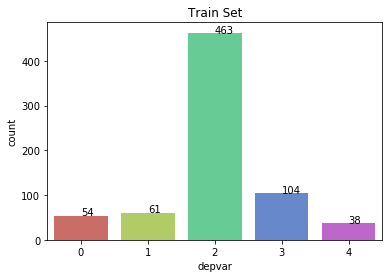

In [18]:
# https://www.kite.com/python/answers/how-to-display-the-value-of-each-bar-in-a-bar-chart-using-matplotlib-in-python
# Train set target value counts
sns.countplot(x ='depvar',data = y_train, palette = 'hls')
for index, value in enumerate(y_train['depvar'].value_counts().sort_index()):
    plt.text(index, value, str(value))
plt.title('Train Set')

Text(0.5, 1.0, 'Test Set')

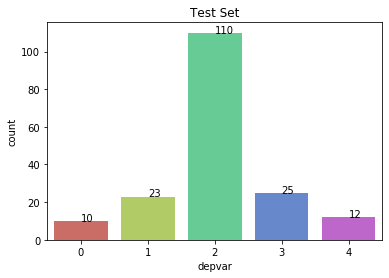

In [19]:
# Test set target value counts
sns.countplot(x ='depvar',data = y_test, palette = 'hls')
for index, value in enumerate(y_test['depvar'].value_counts().sort_index()):
    plt.text(index, value, str(value))
plt.title('Test Set')

In [20]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Create Decision Tree classifer object
dtree = DecisionTreeClassifier(max_depth=4)

# Train Decision Tree Classifer
dtree = dtree.fit(X_train,y_train)

#Predict the response for test dataset
y_train_predicted = dtree.predict(X_train)
y_test_predicted = dtree.predict(X_test)

In [21]:
# Actual and Predicted values
modelEvaluation = y_train.copy()
modelEvaluation['Predicted_train'] = y_train_predicted
modelEvaluation.columns = ['Actual','Predicted_train']
display(modelEvaluation.head(9).transpose())

print('\n')

# Accuracy on Train and Test set
print("Train Set Accuracy:",metrics.accuracy_score(y_train, y_train_predicted))
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_test_predicted))

,10,334,244,678,306,591,118,290,316
Actual,2,2,2,0,2,0,2,2,4
Predicted_train,2,2,2,2,2,2,2,2,2




Train Set Accuracy: 0.6666666666666666
Test Set Accuracy: 0.6


In [22]:
# Sensitivity: the proportion of actual positive cases which are correctly identified.
sens_df = pd.DataFrame(metrics.recall_score(y_train,y_train_predicted,average=None),columns=[' Sensitivity Train'])
sens_df2 = pd.DataFrame(metrics.recall_score(y_test,y_test_predicted,average=None),columns=['Sensitivity Test'])
sens_df = sens_df.join(sens_df2)
sens_df.index= ['ec: 0' ,'er: 1','gc: 2', 'gr: 3','hp: 4']
sens_df.transpose()

,ec: 0,er: 1,gc: 2,gr: 3,hp: 4
Sensitivity Train,0.02,0.11,0.99,0.09,0.13
Sensitivity Test,0.00,0.00,0.98,0.00,0.00


In [23]:
from imblearn.metrics import specificity_score as spec_score
# Specificity the proportion of actucal negative cases which are correctly identified
spec_df = pd.DataFrame(spec_score(y_train, y_train_predicted,average = None),columns=['Specificity Train'])
spec_df2 = pd.DataFrame(spec_score(y_test, y_test_predicted,average = None),columns=['Specificity Test'])
spec_df = spec_df.join(spec_df2)
spec_df.index= ['ec: 0' ,'er: 1','gc: 2', 'gr: 3','hp: 4']
spec_df.transpose()


,ec: 0,er: 1,gc: 2,gr: 3,hp: 4
Specificity Train,1.00,1.00,0.11,0.99,0.99
Specificity Test,1.00,0.98,0.09,0.99,0.98


Text(0.5, 257.44, 'Predicted label')

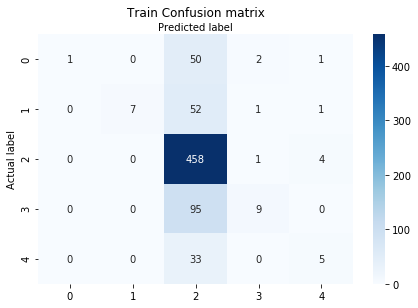

In [24]:
# Confusion Matrix
cnf_matrix_train = metrics.confusion_matrix(y_train, y_train_predicted)
cnf_matrix_test = metrics.confusion_matrix(y_test, y_test_predicted)
class_names=[0,1,2,3,4]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_train), annot=True,cmap="Blues",fmt= "g")
#sns.heatmap(pd.DataFrame(cnf_matrix_test), annot=True,cmap="Blues",fmt= "g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Train Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()

feature_cols  = X.columns

export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['Electric Central_0' ,'Electric Room_1','Gas Central_2', 'Gas Room_3','Heat Pump_4'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('heating Systems.png')
Image(graph.create_png())

In [26]:
from sklearn.linear_model import LogisticRegression
model_multi = LogisticRegression(multi_class='multinomial',solver="newton-cg")
model_multi.fit(X_train,y_train)

y_train_predicted_multi = model_multi.predict(X_train)
y_test_predicted_multi = model_multi.predict(X_test)

C:\Users\agust\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [28]:
# Accuracy 
acc_dtree =  metrics.accuracy_score(y_test, y_test_predicted)
acc_multi = metrics.accuracy_score(y_test, y_test_predicted_multi)

print("Decision Tree Accuracy:",acc_dtree)
print("Multinominal Accuracy:",acc_multi)

# Sensitivity
sens_dtree = pd.DataFrame(metrics.recall_score(y_test, y_test_predicted,average = None),columns=['Decision Tree Sensitivity'])
sens_multi = pd.DataFrame(metrics.recall_score(y_test,y_test_predicted_multi,average=None),columns=['Multinominal Sensitivity '])
# Specificity
spec_dtree = pd.DataFrame(spec_score(y_test, y_test_predicted,average = None),columns=['Decision Tree Specificity'])
spec_multi = pd.DataFrame(spec_score(y_test, y_test_predicted_multi,average = None),columns=['Multinominal Specificity'])

sens_dtree = sens_dtree.join(sens_multi)
sens_dtree = sens_dtree.join(spec_dtree)
sens_dtree = sens_dtree.join(spec_multi)

sens_dtree.index= ['ec: 0' ,'er: 1','gc: 2', 'gr: 3','hp: 4']
sens_dtree.transpose()

Decision Tree Accuracy: 0.6
Multinominal Accuracy: 0.6111111111111112


,ec: 0,er: 1,gc: 2,gr: 3,hp: 4
Decision Tree Sensitivity,0.00,0.00,0.98,0.00,0.00
Multinominal Sensitivity,0.00,0.00,1.00,0.00,0.00
Decision Tree Specificity,1.00,0.98,0.09,0.99,0.98
Multinominal Specificity,1.00,1.00,0.00,1.00,1.00
